## Original Analaysis Of Vasculature Head/Mid/Tail

In [141]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy

from IPython.display import display # to display pandas df

from bimpy.util.bTiffFile import imread as bImRead

In [142]:
## Make plots on black background (for slides)
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

In [27]:
def printStackInfo(name, localData):
    flatStack = np.ravel(localData[~np.isnan(localData)])
    mean = np.nanmean(flatStack)
    std = np.nanstd(flatStack)
    cv = std/mean
    pcv = cv * 100 # cv as a percentage

    print(name, 
          stackData.shape, 
          stackData.dtype, 
          'min:', np.nanmin(stackData), 
          'max:', np.nanmax(stackData), 
          'mean:', round(mean,2),
          'std:', round(std,2),
          'CV:',round(cv,2),
          'pCV:',round(pcv,2),
        )

### Load head/mid/tail masks for ch1/ch1 (e.g. hcn4 and vasculature)

In [79]:
myLegendList = [
    'head',
    'mid',
    'distalHead',
]

# ch1
pathList1 = [
    '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_HEAD__ch1_8_mask.tif',
    '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_MID__ch1_8_mask.tif',
    '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_distalHEAD__ch1_8_mask.tif',
]

stackDataList1 = []
tiffHeaderList = []
for path in pathList1:
    stackData, tiffHeader = bImRead(path)

    filename = os.path.basename(path)
    printStackInfo(filename, stackData)

    stackDataList1.append(stackData)
    tiffHeaderList.append(tiffHeader)

# ch2
pathList2 = [
    '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_HEAD__ch2_8_mask.tif',
    '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_MID__ch2_8_mask.tif',
    '/Users/cudmore/box/data/nathan/20200420/analysis/20200420_distalHEAD__ch2_8_mask.tif',
]

stackDataList2 = []
for path in pathList2:
    stackData, tiffHeader = bImRead(path)

    filename = os.path.basename(path)
    printStackInfo(filename, stackData)

    stackDataList2.append(stackData)


20200420_HEAD__ch1_8_mask.tif (36, 1024, 1024) uint8 min: 0 max: 1 mean: 0.78 std: 0.41 CV: 0.52 pCV: 52.34
20200420_MID__ch1_8_mask.tif (23, 1024, 1024) uint8 min: 0 max: 1 mean: 0.56 std: 0.5 CV: 0.88 pCV: 88.04
20200420_distalHEAD__ch1_8_mask.tif (26, 1024, 1024) uint8 min: 0 max: 1 mean: 0.5 std: 0.5 CV: 0.99 pCV: 99.41
20200420_HEAD__ch2_8_mask.tif (36, 1024, 1024) uint8 min: 0 max: 1 mean: 0.06 std: 0.23 CV: 4.1 pCV: 410.45
20200420_MID__ch2_8_mask.tif (23, 1024, 1024) uint8 min: 0 max: 1 mean: 0.05 std: 0.21 CV: 4.5 pCV: 449.93
20200420_distalHEAD__ch2_8_mask.tif (26, 1024, 1024) uint8 min: 0 max: 1 mean: 0.03 std: 0.18 CV: 5.47 pCV: 546.77


In [ ]:
def zDensity(stackData, tiffHeader=None):
    if tiffHeader is not None:
        voxelVolume = tiffHeader['xVoxel'] * tiffHeader['yVoxel'] * tiffHeader['zVoxel']
    else:
        voxelVolume = 1
    numSlices = stackData.shape[0]
    sliceDen = stackData.shape[1] * stackData.shape[2]
    zDen = np.ndarray(numSlices)
    for i in range(numSlices):
        maskPixels = stackData[i,:,:]
        maskPixels = np.sum(maskPixels)
        if maskPixels == 0:
            zDen[i] = np.nan
        else:
            zDen[i] = maskPixels / sliceDen * 100
            #zDen[i] = maskPixels * voxelVolume
    return zDen

min/max hcn vol: 33.22610855102539 87.00389862060547
min/max vasc vol: 1.1887550354003906 7.275581359863281


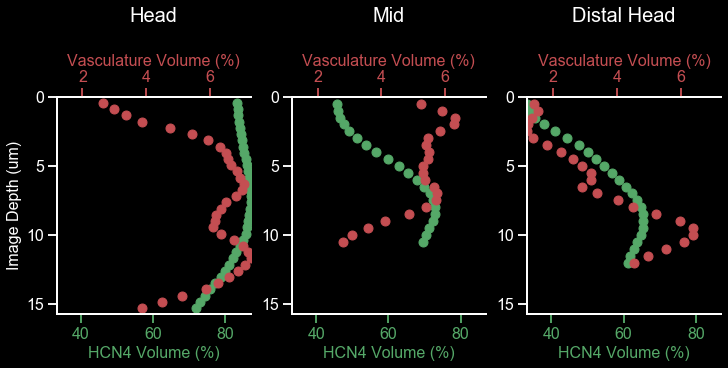

In [118]:
myLegendList = ['Head', 'Mid', 'Distal Head']
myFontSize = 20
myFontSizeSmaller = 16

fig, axs = plt.subplots(1, 3, sharey=False, figsize=(10,5), constrained_layout=True)
#fig.suptitle('HCN4 Mask')

secondAxesList = []
maxDepth = 0
maxHcnVol = 0
maxVascVol = 0
minHcnVol = 2**16
minVascVol = 2**16
for idx, condition in enumerate(myLegendList):
    
    tiffHeader = tiffHeaderList[idx] # this was from ch1
    
    # ch1
    stackData = stackDataList1[idx]
    zDen = zDensity(stackData, tiffHeader=tiffHeader)

    # keep track of min/max to make all plots same axis
    max_z_den = np.nanmax(zDen)
    if max_z_den > maxHcnVol:
        maxHcnVol = max_z_den
    min_z_den = np.nanmin(zDen)
    if min_z_den < minHcnVol:
        minHcnVol = min_z_den
        
    numSlices = stackData.shape[0]
    lastSliceDepth = (numSlices-1) * tiffHeader['zVoxel']
    if lastSliceDepth > maxDepth:
        maxDepth = lastSliceDepth
    zList = range(numSlices)
    zList = [z * tiffHeader['zVoxel'] for z in zList]
    
    l1, = axs[idx].plot(zDen,zList, 'og', label='HCN4')
    axs[idx].set_ylim(numSlices, 0)
    axs[idx].set_xlabel('HCN4 Volume (%)', fontsize = myFontSizeSmaller, color='g')
    if idx == 0:
        axs[idx].set_ylabel('Image Depth (um)', fontsize = myFontSizeSmaller)
    #axs[idx].set_xticklabels(zDen, fontsize=16) # awefull results
    axs[idx].spines['right'].set_visible(False)

    axs[idx].set_title(condition, pad=75, size=myFontSize)
    
    axs[idx].tick_params(axis='x', labelsize=myFontSizeSmaller, colors='g') 
    axs[idx].tick_params(axis='y', labelsize=myFontSizeSmaller, colors='w') 

    # ch2 (top axis)
    if stackDataList2:
        stackData = stackDataList2[idx]
        zDen = zDensity(stackData, tiffHeader)
 
        # keep track of min/max to make all plots same axis
        max_z_den = np.nanmax(zDen)
        if max_z_den > maxVascVol:
            maxVascVol = max_z_den
        min_z_den = np.nanmin(zDen)
        if min_z_den < minVascVol:
            minVascVol = min_z_den

        ax2 = axs[idx].twiny()
        secondAxesList.append(ax2)
        l2, = secondAxesList[idx].plot(zDen,zList, 'or', label='Vasculature')
        secondAxesList[idx].set_xlabel('Vasculature Volume (%)', fontsize = myFontSizeSmaller, color='r')
        secondAxesList[idx].tick_params(axis='x', labelsize=myFontSizeSmaller, colors='r') 
        secondAxesList[idx].spines['right'].set_visible(False)

    # works but cluttered
    #if idx == 2:
    #    axs[idx].legend([l1, l2],["HCN4", "Vasculature"], frameon=False)

print('min/max hcn vol:', minHcnVol, maxHcnVol)
print('min/max vasc vol:', minVascVol, maxVascVol)
for idx, condition in enumerate(myLegendList):
    axs[idx].set_ylim(maxDepth, 0)
    axs[idx].set_xlim(minHcnVol, maxHcnVol)
    secondAxesList[idx].set_xlim(minVascVol, maxVascVol)
    


## Do the same for one channel but across a number of files (20201017)

In [123]:
baseFileList = [
    '/Users/cudmore/box/data/nathan/20201017/analysis/20191017_0001',
    '/Users/cudmore/box/data/nathan/20201017/analysis/20191017_0002',
    '/Users/cudmore/box/data/nathan/20201017/analysis/20191017_0003',
    '/Users/cudmore/box/data/nathan/20201017/analysis/20191017_0004',
    '/Users/cudmore/box/data/nathan/20201017/analysis/20191017_0005',
    '/Users/cudmore/box/data/nathan/20201017/analysis/20191017_0006',
    '/Users/cudmore/box/data/nathan/20201017/analysis/20191017_0007',
    '/Users/cudmore/box/data/nathan/20201017/analysis/20191017_0008',
    '/Users/cudmore/box/data/nathan/20201017/analysis/20191017_0009',
]


In [153]:
# load all the stacks
edtDataList = [] # mask
stackDataList = [] # mask
tiffHeaderList = []
for path in baseFileList:
    maskPath = path + '_ch1_8_mask.tif'
    stackData, tiffHeader = bImRead(maskPath)

    filename = os.path.basename(maskPath)
    printStackInfo(filename, stackData)

    stackDataList.append(stackData) # mask
    tiffHeaderList.append(tiffHeader)

    # edt
    edtPath = path + '_ch1_9_edt.tif'
    stackData, tiffHeader = bImRead(edtPath)
    edtDataList.append(stackData) # mask

    filename = os.path.basename(edtPath)
    printStackInfo(filename, stackData)


20191017_0001_ch1_8_mask.tif (145, 640, 640) uint8 min: 0 max: 1 mean: 0.04 std: 0.2 CV: 4.75 pCV: 475.23
20191017_0001_ch1_9_edt.tif (145, 640, 640) float32 min: 0.0 max: 48.08311 mean: 10.6 std: 7.66 CV: 0.72 pCV: 72.24
20191017_0002_ch1_8_mask.tif (78, 640, 640) uint8 min: 0 max: 1 mean: 0.04 std: 0.2 CV: 4.9 pCV: 490.11
20191017_0002_ch1_9_edt.tif (78, 640, 640) float32 min: 0.0 max: 43.88316 mean: 9.92 std: 6.84 CV: 0.69 pCV: 68.97
20191017_0003_ch1_8_mask.tif (63, 640, 640) uint8 min: 0 max: 1 mean: 0.03 std: 0.16 CV: 6.12 pCV: 612.36
20191017_0003_ch1_9_edt.tif (63, 640, 640) float32 min: 0.0 max: 43.510857 mean: 10.62 std: 6.73 CV: 0.63 pCV: 63.34
20191017_0004_ch1_8_mask.tif (91, 640, 640) uint8 min: 0 max: 1 mean: 0.01 std: 0.11 CV: 9.15 pCV: 914.79
20191017_0004_ch1_9_edt.tif (91, 640, 640) float32 min: 0.0 max: 91.98939 mean: 21.0 std: 12.66 CV: 0.6 pCV: 60.3
20191017_0005_ch1_8_mask.tif (71, 640, 640) uint8 min: 0 max: 1 mean: 0.0 std: 0.07 CV: 14.14 pCV: 1414.03
20191017_

min/max vasc vol: 0.0006591796875 53.6000244140625 maxDepth: 57.6


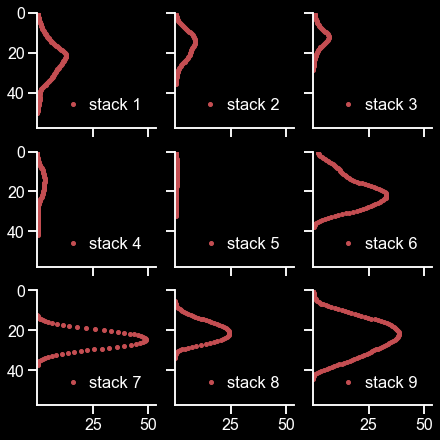

In [218]:

#
# plot
myLegendList = ['Head', 'Mid', 'Distal Head']
myFontSize = 20
myFontSizeSmaller = 16

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(6,6), constrained_layout=True)
axs = np.ravel(axs)

maxDepth = 0
maxVascVol = 0
minVascVol = 2**16
for idx, stackData in enumerate(stackDataList):
    
    tiffHeader = tiffHeaderList[idx] # this was from ch1
    
    # ch1
    zDen = zDensity(stackData, tiffHeader=tiffHeader)

    # keep track of min/max to make all plots same axis
    max_z_den = np.nanmax(zDen)
    if max_z_den > maxVascVol:
        maxVascVol = max_z_den + (max_z_den * 0.1)
    min_z_den = np.nanmin(zDen)
    if min_z_den < minVascVol:
        minVascVol = min_z_den - (min_z_den * 0.1)
        
    numSlices = stackData.shape[0]
    lastSliceDepth = (numSlices-1) * tiffHeader['zVoxel']
    if lastSliceDepth > maxDepth:
        maxDepth = lastSliceDepth
    zList = range(numSlices)
    zList = [z * tiffHeader['zVoxel'] for z in zList]
    
    #
    # plot
    label = 'stack ' + str(idx+1)
    l1, = axs[idx].plot(zDen,zList, 'or', markersize=4, label=label)
    
    #x/y labels
    """
    if idx in [6,7,8]:
        axs[idx].set_xlabel('Vascular Volume (%)', fontsize = myFontSizeSmaller, color='w')
    if idx in [0,3,6]:
        axs[idx].set_ylabel('Image Depth (um)', fontsize = myFontSizeSmaller)
    """
    
    # legend without markers (DOES NOT WORK !!!)
    myLegend = axs[idx].legend(loc="lower right", handlelength=0, handletextpad=1, frameon=False) # uses label from .plot
    for item in myLegend.legendHandles:
        item.set_visible(False)
       
    axs[idx].spines['top'].set_visible(False)
    axs[idx].spines['right'].set_visible(False)

    #axs[idx].set_title(idx, pad=75, size=myFontSize)
    
    axs[idx].tick_params(axis='x', labelsize=myFontSizeSmaller, colors='w') 
    axs[idx].tick_params(axis='y', labelsize=myFontSizeSmaller, colors='w') 

#fig.text(0.5, 0.04, 'common X', ha='center')
#fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')

#if minVascVol == 0:
#    minVascVol = - (max_z_den * 0.1)

print('min/max vasc vol:', minVascVol, maxVascVol, 'maxDepth:', maxDepth)
for idx in range(len(stackDataList)):
    axs[idx].set_ylim(maxDepth, 0) # reversed
    axs[idx].set_xlim(minVascVol, maxVascVol)
    #secondAxesList[idx].set_xlim(minVascVol, maxVascVol)


## mean/sd/se of EDT distance as a function of depth

In [214]:
def edtAsFuncOfZ(edtStack, tiffHeader=None):
    """
    use tiffHeader to get z depth in um
    """
    numSlices = edtStack.shape[0]
    
    zmean = np.ndarray(numSlices)
    zstd = np.ndarray(numSlices)
    zsem = np.ndarray(numSlices)
    
    for i in range(numSlices):
        edtPixels = edtStack[i,:,:]
        edtPixels = np.ravel(edtPixels)
        
        edtmean = np.nanmean(edtPixels)
        edtstd = np.nanstd(edtPixels)
        edtsem = scipy.stats.sem(edtPixels)
        
        zmean[i] = edtmean
        zstd[i] = edtstd
        zsem[i] = edtsem
    
    return zmean, zstd, zsem



min_edt: 0 max_edt: 30.12436294555664 maxDepth: 57.6


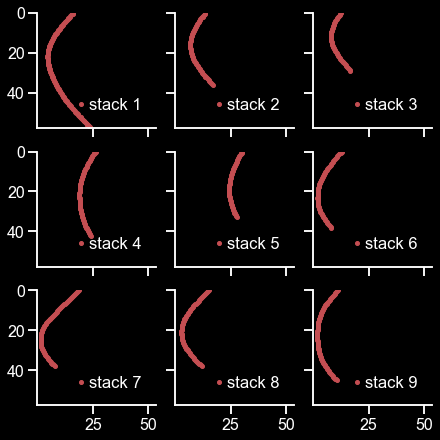

In [219]:
fig, axs = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(6,6), constrained_layout=True)
axs = np.ravel(axs)

min_edt = 2**16
max_edt = 0
maxDepth = 0
for idx, edtData in enumerate(edtDataList):
        
    tiffHeader = tiffHeaderList[idx] # this was from ch1

    zmean, zstd, zsem = edtAsFuncOfZ(edtData, tiffHeader)
    
    # cant see sem ... too smal
    #if idx == 0:
    #    print(zmean)
    #    print(zstd)
    #    print(zsem)
        
    # plot
    numSlices = edtData.shape[0]
    zList = range(numSlices)
    zList = [z * tiffHeader['zVoxel'] for z in zList]

    label = 'stack ' + str(idx+1)
    l1, = axs[idx].plot(zmean,zList, 'or', markersize=4, label=label)
    #axs[idx].errorbar(zmean,zList, xerr=zsem, capthick=2, fmt='.r', label=label)
    
    myLegend = axs[idx].legend(loc="lower right", handlelength=0, handletextpad=0.5, frameon=False) # uses label from .plot

    """
    if idx in [6,7,8]:
        axs[idx].set_xlabel('EDT Mean (um)', fontsize = myFontSizeSmaller, color='w')
    if idx in [0,3,6]:
        axs[idx].set_ylabel('Image Depth (um)', fontsize = myFontSizeSmaller)
    """
    
    axs[idx].spines['top'].set_visible(False)
    axs[idx].spines['right'].set_visible(False)

    axs[idx].tick_params(axis='x', labelsize=myFontSizeSmaller, colors='w') 
    axs[idx].tick_params(axis='y', labelsize=myFontSizeSmaller, colors='w') 

    # keep track of min/max to make all plots same axis
    maxMeanEDT = np.nanmax(zmean)
    if maxMeanEDT > max_edt:
        max_edt = maxMeanEDT
    minMeanEDT = np.nanmin(zmean)
    if minMeanEDT < min_edt:
        min_edt = minMeanEDT
        
    numSlices = edtData.shape[0]
    lastSliceDepth = (numSlices-1) * tiffHeader['zVoxel']
    if lastSliceDepth > maxDepth:
        maxDepth = lastSliceDepth

min_edt = 0

# set all axes to same min/max
print('min_edt:', min_edt, 'max_edt:', max_edt, 'maxDepth:', maxDepth)
for idx in range(len(edtDataList)):
    #axs[idx].set_xlim(minVascVol, maxVascVol) # from previous cell
    axs[idx].set_xlim(min_edt, max_edt)
    axs[idx].set_ylim(maxDepth, 0) # reversed


## vasc volume and edt on same plot

min_edt: 0 max_edt: 30.12436294555664 maxDepth: 57.6


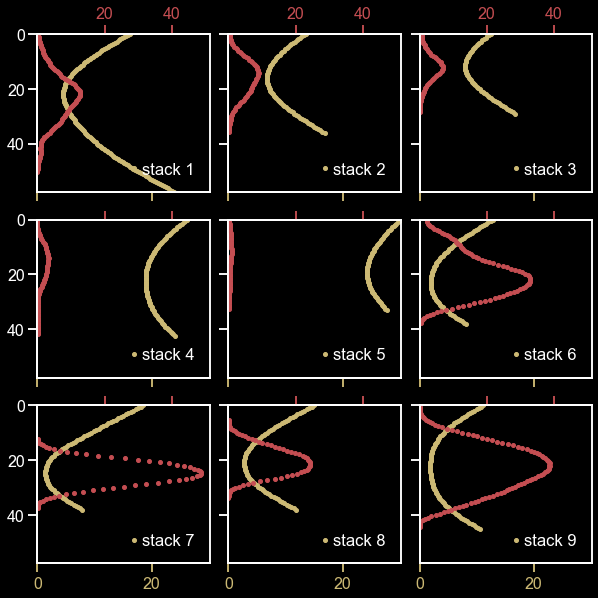

In [236]:
fig, axs = plt.subplots(3, 3, sharey=True, sharex=True, figsize=(8.2,8.2), constrained_layout=True)
axs = np.ravel(axs)

min_edt = 2**16
max_edt = 0
maxDepth = 0
secondAxesList = []
maxVascVol = 0
minVascVol = 2**16
for idx, edtData in enumerate(edtDataList):
        
    tiffHeader = tiffHeaderList[idx] # this was from ch1

    zmean, zstd, zsem = edtAsFuncOfZ(edtData, tiffHeader)
    
    # cant see sem ... too smal
    #if idx == 0:
    #    print(zmean)
    #    print(zstd)
    #    print(zsem)
        
    # plot
    numSlices = edtData.shape[0]
    zList = range(numSlices)
    zList = [z * tiffHeader['zVoxel'] for z in zList]

    label = 'stack ' + str(idx+1)
    l1, = axs[idx].plot(zmean,zList, 'oy', markersize=4, label=label)
    
    myLegend = axs[idx].legend(loc="lower right", handlelength=0, handletextpad=0.5, frameon=False) # uses label from .plot


    axs[idx].tick_params(axis='x', labelsize=myFontSizeSmaller, colors='y') 
    axs[idx].tick_params(axis='y', labelsize=myFontSizeSmaller, colors='w') 

    # keep track of min/max to make all plots same axis
    maxMeanEDT = np.nanmax(zmean)
    if maxMeanEDT > max_edt:
        max_edt = maxMeanEDT
    minMeanEDT = np.nanmin(zmean)
    if minMeanEDT < min_edt:
        min_edt = minMeanEDT
        
    numSlices = edtData.shape[0]
    lastSliceDepth = (numSlices-1) * tiffHeader['zVoxel']
    if lastSliceDepth > maxDepth:
        maxDepth = lastSliceDepth

    #
    # second axis
    stackData2 = stackDataList[idx]
    zDen = zDensity(stackData2, tiffHeader=tiffHeader)
    
    # keep track of min/max to make all plots same axis
    max_z_den = np.nanmax(zDen)
    if max_z_den > maxVascVol:
        maxVascVol = max_z_den + (max_z_den * 0.05)
    min_z_den = np.nanmin(zDen)
    if min_z_den < minVascVol:
        minVascVol = min_z_den - (min_z_den * 0.05)

    ax2 = axs[idx].twiny()
    secondAxesList.append(ax2)
    l2, = secondAxesList[idx].plot(zDen,zList, 'or', markersize=4, label='')
    #secondAxesList[idx].set_xlabel('Vasculature Volume (%)', fontsize = myFontSizeSmaller, color='r')
    if idx in [0,1,2]:
        secondAxesList[idx].tick_params(axis='x', labelsize=myFontSizeSmaller, colors='r') 
    else:
        # off
        #secondAxesList[idx].set_ticklabels(False)
        secondAxesList[idx].tick_params(axis='x', colors='r', labeltop=False) 
        
    #secondAxesList[idx].spines['top'].set_visible(False)
    secondAxesList[idx].spines['right'].set_visible(False)

min_edt = 0

# set all axes to same min/max
print('min_edt:', min_edt, 'max_edt:', max_edt, 'maxDepth:', maxDepth)
for idx in range(len(edtDataList)):
    #axs[idx].set_xlim(minVascVol, maxVascVol) # from previous cell
    axs[idx].set_xlim(min_edt, max_edt)
    axs[idx].set_ylim(maxDepth, 0) # reversed
    secondAxesList[idx].set_xlim(minVascVol, maxVascVol)


## Plot vascular volume for vessel on 20201017

This is the vascular volume percent for the whole stack

vascNorm: 4.2400255926724135
vascNorm: 3.99662585136218
vascNorm: 2.5975012400793647
vascNorm: 1.180859911572802
vascNorm: 0.4976411201584507
vascNorm: 15.959347608612806
vascNorm: 13.810222346608233
vascNorm: 8.111593106897868
vascNorm: 18.35656109052835


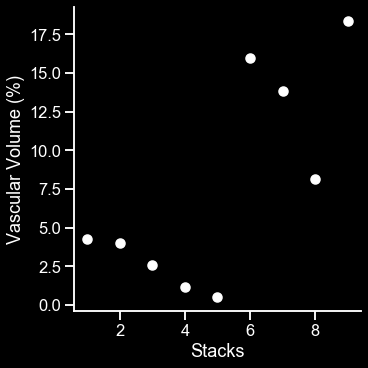

In [122]:

vascChan = 0
vascVolNorm = []
for file in baseFileList:
    # _results.csv
    resultPath = file + '_results.csv'
    df = pd.read_csv(resultPath)

    # 1
    stackVol = df['vStack'].iloc[vascChan]
    vascVol = df['vMask'].iloc[vascChan]
    vascNorm = vascVol / stackVol * 100
    print('vascNorm:', vascNorm)
    vascVolNorm.append(vascNorm)

myx = [idx+1 for idx in range(len(vascVolNorm))] # stacks 1,2,3,...

finalColorList = 'w'

fig, axs = plt.subplots(1, 1, sharey=False, figsize=(5,5), constrained_layout=True)

axs = [axs]

axs[0].scatter(myx, vascVolNorm, c=finalColorList)
#axs[0].set_xlim(40,90)
#axs[0].set_ylim(0, 8)
axs[0].set_xlabel('Stacks')
axs[0].set_ylabel('Vascular Volume (%)')
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
